In [71]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from skimage import img_as_float
import requests
import shutil
from io import BytesIO

### We will begin by fetching an image
This image is fetched via [thispersondoesnotexist.com](thispersondoesnotexist.com)

In [125]:
url = "https://thispersondoesnotexist.com/image"
image = requests.get(url).content

We now save the binary-format content to disk

In [126]:
with open('img.png', 'wb') as f:
    f.write(image)

Using `skimage`, we convert it into a numpy array

In [127]:
image = io.imread("./img.png")

(0.0, 0.5)

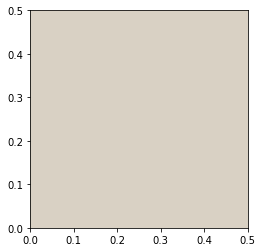

In [128]:
plt.imshow(image)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

# Neuron Graph
This graph representation of a neuron network is very abstract. It simply represents a node with data that can be linked inwards and outwards to other neighboring nodes. 

In [129]:
class Neuron:
    def __init__(self, data, pos):
        self.data = data # Cell body
        self.pos = pos
        self.dendrites = []
    
    # Send data
    def Axon(self):
        return self.data
    
    # Spark (on time?)
    # Connections -> surrounding neurons (matrix {T-L-DL-DR-BL-BR..})
    
    
    

In [192]:
neuron_cells = []
count = 0
for i in range(image.shape[0]):
    neuron_rows = []
    for j in range(image.shape[1]):
        data = image[i, j, :]
        pos = [i, j]
        # Create a neuron, and append
        neuron_rows.append(Neuron(data=data, pos=pos))
    neuron_cells.append(neuron_rows)

In [193]:
lr = len(neuron_cells) # rows
lc = len(neuron_cells[0]) # columns
# Always symmetrical, just for easy understanding

validator = lambda index: (0 <= index < lr) and (0 <= index < lc)
for i in range(len(neuron_cells)): # rows
    for j in range(len(neuron_cells[0])):
        # Top
        if validator(i-1):
            neuron_cells[i][j].dendrites.append(
                neuron_cells[i-1][j]
            )
        # Bottom
        if validator(i+1):
            neuron_cells[i][j].dendrites.append(
                neuron_cells[i+1][j]
            )
        # Right
        if validator(j+1):
            neuron_cells[i][j].dendrites.append(
                neuron_cells[i][j+1]
            )
        # Left
        if validator(j-1):
            neuron_cells[i][j].dendrites.append(
                neuron_cells[i][j-1]
            )
        # Diagonal Top Right
        if validator(i-1) and validator(j+1):
            neuron_cells[i][j].dendrites.append(
                neuron_cells[i-1][j+1]
            )
        # Diagonal Top Left
        if validator(i-1) and validator(j-1):
            neuron_cells[i][j].dendrites.append(
                neuron_cells[i-1][j-1]
            )
        # Diagonal Bottom Left
        if validator(i+1) and validator(j-1):
            neuron_cells[i][j].dendrites.append(
                neuron_cells[i+1][j-1]
            )
        # Diagonal Bottom Right
        if validator(i+1) and validator(j+1):
            neuron_cells[i][j].dendrites.append(
                neuron_cells[i+1][j+1]
            )

If you'd like to manually check all (don't, there's $1024 \times 1024$)

In [194]:
image_recover = []
for i in range(lr):
    image_row = []
    for j in range(lc):
        image_row.append(neuron_cells[i][j].data)

    image_recover.append(image_row)

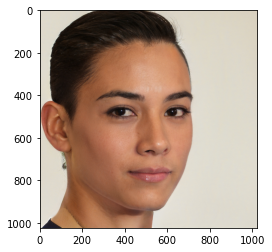

In [195]:
plt.imshow(image_recover)